In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
n = 20
x = np.random.randn(n)

[]

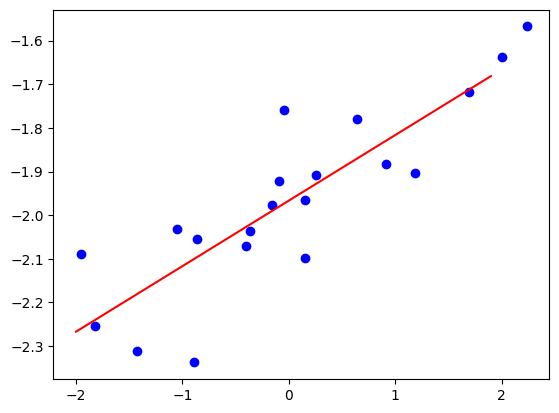

In [21]:
# linear model
y = np.random.randn(1) * x + np.random.randn(1)
y = y + 0.1 * np.random.randn(n) # noise

# least-squares
X = np.stack((x, np.ones(n)), axis=1)
u = np.linalg.inv(X.T@X)@X.T@y

# plot
xp = np.arange(-2, 2, 0.1)
yp = u[0] * xp + u[1]
plt.plot(x, y, "bo")
plt.plot(xp, yp, "r-")
plt.plot()

In [22]:
from sklearn.linear_model import LinearRegression

[]

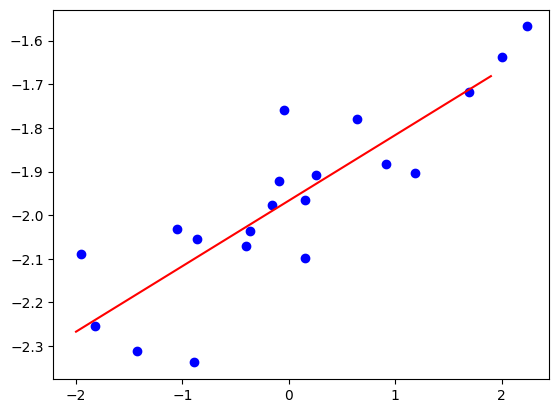

In [23]:
reg_model = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))

# plot
xp = np.arange(-2, 2, 0.1)
yp = reg_model.coef_[0] * xp + reg_model.intercept_
plt.plot(x, y, "bo")
plt.plot(xp, yp, "r-")
plt.plot()

[]

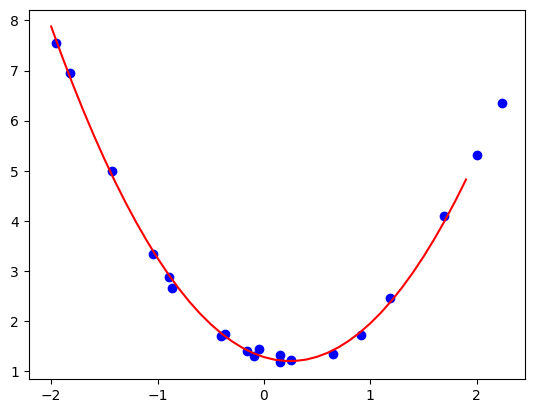

In [24]:
# quadratic model
y = np.random.randn(1) * x * x + np.random.randn(1) * x + np.random.randn(1)
y = y + 0.1 * np.random.randn(n) # noise

# least-squares
X = np.stack((np.square(x), x, np.ones(n)), axis=1)
u = np.linalg.inv(X.T@X)@X.T@y

# plot
xp = np.arange(-2, 2, 0.1)
yp = u[0] * xp * xp + u[1] * xp + u[2]
plt.plot(x, y, "bo")
plt.plot(xp, yp, "r-")
plt.plot()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

[[ 1.27817777 -0.65112063  1.32479001]]


[]

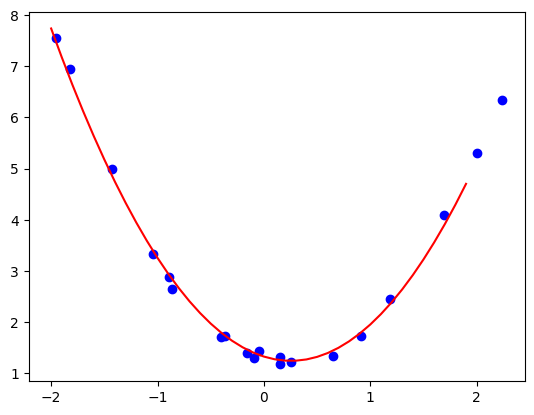

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# plot
xp = np.arange(-2, 2, 0.1)
yp = model.named_steps["linear"].coef_[0][0] * xp * xp + model.named_steps["linear"].coef_[0][1] * xp + model.named_steps["linear"].coef_[0][2]
plt.plot(x, y, "bo")
plt.plot(xp, yp, "r-")
plt.plot()